In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import jax
import jax.numpy as jnp
import pylab as plt

import numpy as np
import matplotlib.pyplot as plt

# local imports
from util.ellipse import plot_ellipse
from doubly_AIS import DAIS

In [2]:
## Create a Gaussian target density
dim = 100

# covariance and precision matrix
mu_1 = 1.*np.ones(dim)
Sigma_1 = 0.9*np.ones((dim,dim))
np.fill_diagonal(Sigma_1, 1.)
Sigma_1_inv = np.linalg.inv(Sigma_1)

def log_target_density(z):
    """
    Gaussian log density
    """
    z_centred = z - mu_1
    return -0.5 * jnp.dot(z_centred, Sigma_1_inv @ z_centred)

In [3]:
## Run DAIS:

# initial mean/covariance
mu_init = np.zeros(dim)
Gamma_init = np.eye(dim)

# damping parameter
alpha_damp = 0.3

# number of smaples and number of iterations
n_samples = 100
n_iter = 100

# Effective Sample size threshold
ESS_threshold = 0.5
save_history = True
    
# run DAIS:
output_dict = DAIS(
                log_target = log_target_density,
                mu_init = mu_init,
                Gamma_init = Gamma_init,
                n_samples = n_samples,
                n_iter = n_iter,
                alpha_damp = alpha_damp,
                ESS_threshold = ESS_threshold,
                save_history=save_history,
                )

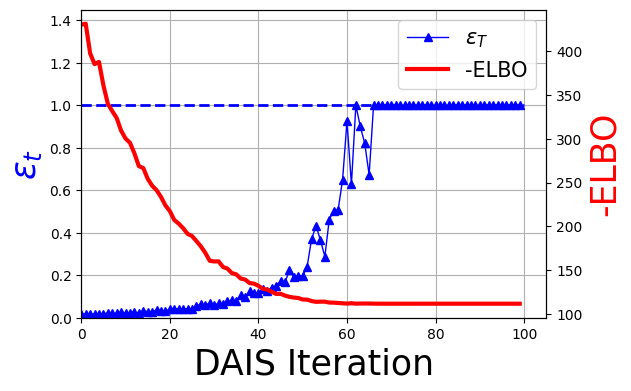

In [4]:
fig, ax_left = plt.subplots(figsize=(6,4))
ax_right = ax_left.twinx()

p1 = ax_left.plot(output_dict["eps_traj"], "-^", lw=1, color='blue', label=r"$\epsilon_T$")
ax_left.plot([0, len(output_dict["eps_traj"])], [1,1], "--", lw=2, color='blue')
ax_left.set_ylim(0,1.45)
ax_left.set_xlim(left=0)
ax_left.set_ylabel(r"$\epsilon_t$", fontsize=25, color="blue")
ax_left.set_xlabel("DAIS Iteration", fontsize=25)

ax_left.grid(True, which="major")



p2 = ax_right.plot(-np.array(output_dict["ELBO_traj"]),
                   color='red', label="-ELBO", lw=3)
ax_right.set_ylabel("-ELBO", fontsize=25, color="red")


# added these three lines
lns = p1+p2
labs = [l.get_label() for l in lns]
ax_left.legend(lns, labs, loc=1, fontsize=25)


# added these three lines
lns = p1+p2
labs = [l.get_label() for l in lns]
ax_left.legend(lns, labs, loc=1, fontsize=15)

plt.savefig("gauss_monitor.pdf", dpi=200, bbox_inches='tight')